In [1]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from matplotlib import pyplot as plt

In [163]:
import json
with open("./n_random_exploration10-l1.0-l_bagging0.1-acquisition_percentile0.5-bandit_greediness1.0_niter200_381414.json") as f:
    d = json.loads(f.read())

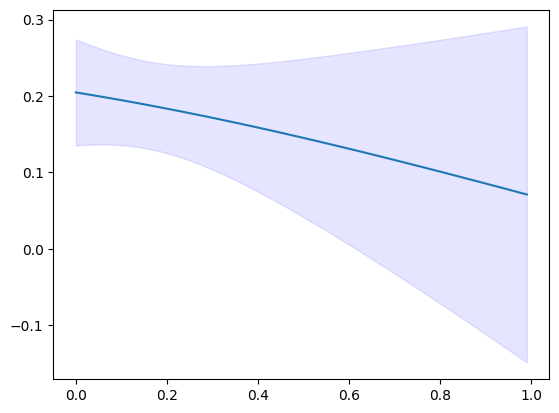

In [168]:
inputs = np.array(d["hyperparameter_scores"]["all-models"]["inputs"])
output = np.array(d["hyperparameter_scores"]["all-models"]["output"]) - 0.5
inputs = inputs[:10,:]
output = output[:10]
kernel = RBF(1.0)
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(inputs, output)

x = np.arange(0, 1.0, 0.01)
x = np.repeat(x, 9).reshape(-1, 9)
x[:,2] = x[:,2][::-1]
x[:,3] = x[:,3][::-1]

mean, var = gp.predict(x, return_std=True)

fig, ax = plt.subplots()
ax.plot(x[:,0].flatten(),mean)
ax.fill_between(x[:,0], (mean-var), (mean+var), color='b', alpha=.1)

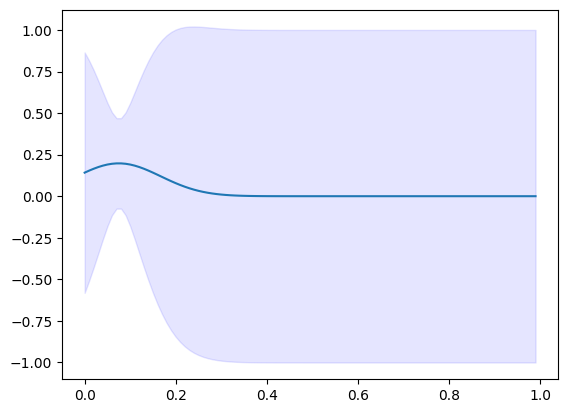

In [167]:
inputs = np.array(d["bagging_scores"]["all-models"]["inputs"])
inputs[:,0] = inputs[:,0]/10
output = np.array(d["bagging_scores"]["all-models"]["output"]) - 0.5

inputs = inputs[:10,:]
output = output[:10]

kernel = RBF(0.13)
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(inputs, output)

x = np.arange(0, 1.0, 0.01)
x = np.repeat(x, 2).reshape(-1, 2)
mean, var = gp.predict(x, return_std=True)

fig, ax = plt.subplots()
ax.plot(x[:,0].flatten(),mean)
ax.fill_between(x[:,0], (mean-var), (mean+var), color='b', alpha=.1)